<a href="https://colab.research.google.com/github/xorToja/data-science-bootcamp/blob/master/07_uczenie_glebokie/01_pierwsza_siec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Digit Recognition
### Tensorflow
>Strona biblioteki: [https://www.tensorflow.org/](https://www.tensorflow.org/)  
>Dokumentacja: [https://www.tensorflow.org/api_docs](https://www.tensorflow.org/api_docs)  
>
>Szybko rozwijająca się biblioteka do uczenia maszynowego i uczenia głębokiego rozwijana przez Google.
>
>Aby zainstalować bibliotekę tensorflow, użyj polecenia poniżej:
```
pip install tensorflow
```

### Keras
>Strona biblioteki: [https://keras.io/](https://keras.io/)  
>
>Wysokopoziomowy interfejs do budowy sieci neuronowych. Działa zarówno na Tensorflow, Theano oraz CNTK.
>
>Aby zainstalować bibliotekę keras, użyj polecenia poniżej:
```
pip install keras
```

### Spis treści
1. [Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)](#a1)
1. [Import bibliotek](#a2)
2. [Załadowanie i przygotowanie danych](#a3)
3. [Eksploracja danych](#a4)
4. [Budowa sieci neuronowej](#a5)    
5. [Trenowanie modelu](#a6)
6. [Ocena modelu](#a7)
7. [Predykcja na podstawie modelu](#a8)

![architecture.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/architecture.jpg)
![perceptron.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron.jpg)
![perceptron_2.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/perceptron_2.jpg)
![multi.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/multi.jpg)
![impl_1.jpg](https://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/impl_1.jpg)


### <a name='a1'></a> Pierwszy model sieci - problem klasyfikacji (Hello World w sieciach neuonowych)

>Celem tego notebook'a jest wstępne zapoznanie się z budową prostych sieci neuronowych w problemach klasyfikacji. W tym przypadku wykorzystamy dość popularny zbiór danych MNIST. Jest to zbiór, o którym powinna usłyszeć każda osoba zajmująca się sieciami neuronowymi. Jest swego rodzaju benchmarkiem do budowania sieci.
>
> Zbiór MNIST składa się z 70000 ręcznie zapisanych cyfr o rozdzielczosci 28x28. Zbiór przedstawia cyfry od 0 do 9 i jest podzielony na zbiór treningowy (60000 obrazów) oraz zbiór testowy (10000 obrazów). 



### <a name='a2'></a> Import bibliotek

In [1]:
# działa tylko w Google Colab:
%tensorflow_version 2.x

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

np.set_printoptions(precision = 12, suppress = True, linewidth = 120)
print(tf.__version__)

2.3.0


# Załadowanie i przygotowanie danych

In [16]:
(X_train, y_train), (X_test, y_test) = load_data()

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [17]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [18]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [19]:
# standaryzowanie danych (maksymalnie mogą uzyskać wartość 255, wiec dzielę wartość przez 255)
X_train = X_train / 255.
X_test = X_test / 255.

# Eksploracja danych

(-0.5, 27.5, 27.5, -0.5)

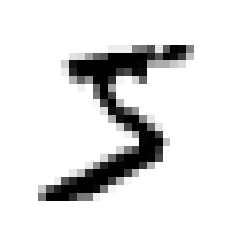

In [9]:
plt.imshow(X_train[0], cmap = 'gray_r')
plt.axis('off')

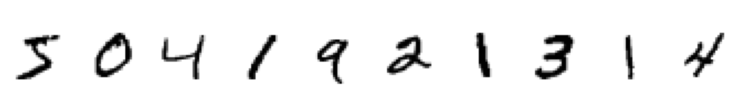

In [10]:
plt.figure(figsize = (13, 13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_train[i-1], cmap = 'gray_r')
  plt.title(y_train[i-1], color='white', fontsize = 16)
plt.show()

# Budowa sieci neuronowej

In [20]:
model = Sequential() # tworzenie instacji modelu sekwencyjnego
model.add(Flatten(input_shape=(28,28))) # dodanie pierwszej warstwy, która wypłaszczy dane
model.add(Dense(units = 128, activation = 'relu')) # warstwa gęstopołączona, zawierająca 128 neuronów ukrytych, z funkcją aktywacji relu (ta funkcja tak naprawdę zeruje wartości ujemne, a dodatnie pozostawia bez zmian)
model.add(Dropout(0.2)) # porzuca 20% neuronów w tej warstwie
model.add(Dense(units=10, activation='softmax')) # to będzie warstwa wyjściowa (10 neuronów, bo mamy 10 klas), dla której zastosujemy funkcję softmax, która zwraca prawd. poszczególnej klasy

# kompilujemy model (domyślnie użyjemy optymalizatora adam)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Trenowanie modelu

In [23]:
X_train.shape
y_train.shape

(60000,)

In [24]:
history = model.fit(X_train, y_train, epochs=5) # epochs - ile razy dane przejdą przez model

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0663 - accuracy: 0.9794
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0578 - accuracy: 0.9816
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0542 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0484 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0465 - accuracy: 0.9845


# Ocena modelu

In [25]:
model.evaluate(X_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.0679 - accuracy: 0.9805


[0.06794589012861252, 0.9804999828338623]

In [26]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy
0,0.066345,0.979383
1,0.057803,0.981600
2,0.054181,0.982467
3,0.048357,0.984100
4,0.046542,0.984467


In [28]:
fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(y=metrics['loss'],name='loss'), row=1, col=1)
fig.add_trace(go.Scatter(y=metrics['accuracy'],name='accuracy'), row=2, col=1)
fig.update_layout(width=800, height=400)

# Predykcja na podstawie modelu

In [29]:
model.predict(X_test)

array([[0.000000346981, 0.000000002821, 0.000013002277, ..., 0.99974746    , 0.000001230514, 0.000006663244],
       [0.            , 0.000003164781, 0.9999968     , ..., 0.            , 0.000000000002, 0.            ],
       [0.000000000096, 0.9999442     , 0.000004316956, ..., 0.00003636384 , 0.000013339824, 0.000000000607],
       ...,
       [0.            , 0.000000000001, 0.            , ..., 0.000000086363, 0.000000102552, 0.000016431   ],
       [0.            , 0.000000000002, 0.            , ..., 0.000000000003, 0.000000331188, 0.            ],
       [0.000000001063, 0.            , 0.000000000873, ..., 0.            , 0.000000000028, 0.000000000002]],
      dtype=float32)

In [30]:
y_pred = model.predict_classes(X_test)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

In [31]:
pred = pd.concat([pd.DataFrame(y_test, columns=['y_test']), pd.DataFrame(y_pred, columns=['y_pred'])], axis = 1)
pred.head(10)

,y_test,y_pred
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [32]:
missclassified = pred[pred['y_test'] != pred['y_pred']]
missclassified.index[:10]

Int64Index([247, 321, 340, 445, 447, 449, 495, 582, 610, 613], dtype='int64')

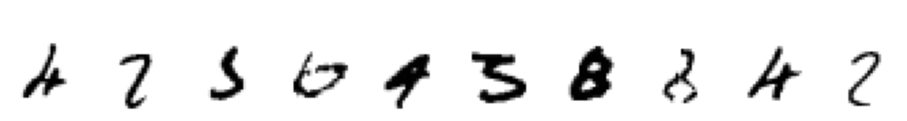

In [34]:
plt.figure(figsize=(16,16))
for i,j in zip(range(1,11), missclassified.index[:10]):
  plt.subplot(1,10,i)
  plt.axis('off')
  plt.imshow(X_test[j], cmap='gray_r')
  plt.title(f'y_test: {y_test[j]}\ny_pred: {y_pred[j]}', color='white', fontsize=12)
plt.show()